In [90]:
import pandas as pd
import numpy as np
from  sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [124]:
n=500

age = np.random.choice(60,n) + 18
income =np. random.choice(200, n)
work_hours = np.random.choice (18,n)+1

expenses= (income**(3/4))*(1-work_hours/24) ##(=income**(3/4) - income**(3/4)*work_hours/24)
#расходы = доход возраст рабочие часы пол

фукнция расходов от доходов и рабочего времени. С ростом дохода расходы растут не так быстро (степень 3/4).Чем больше человек работает , тем меньше остается времени, чтобы тратить (1-work_hours/24) :-)

In [125]:
data=pd.DataFrame({'age':age,'income': income, 'work_hours':work_hours,'expenses':expenses})
data.head()

age  income  work_hours   expenses
0   23      48           6  13.677042
1   23      28          11   6.593267
2   37      54           6  14.940206
3   70      89          13  13.280791
4   55     183           4  41.462651

In [152]:
model=LinearRegression()
x=data[['age','income','work_hours']] 
y=data['expenses']
model.fit(x,y)

print('Weights: {}'.format(model.coef_))
print('Bias: {}'.format(model.intercept_))

pred_values = model.predict(data[['age','income','work_hours']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))
print('Коэфф детерминации:', format(model.score(x,y)))

Weights: [ 0.00182856  0.1493498  -1.36756719]
Bias: 16.092320502072297
Error: 2.4537158120795337
Коэфф детерминации: 0.9202589310416459


In [146]:
print(y.median())
print(y.var()**(1/2))

16.91033928271966
11.407846284667738


Получалась модель с очень большим смещением, 
которая практически не зависит от первой переменной, 
небольшая зависимость от income, 
обратно пропорциональна раб часам.
ПРи этом коэф детерминации очень высокий, что говорит о хорошем качетве модели :-)

In [156]:
model2=LinearRegression()
x=data[['income','work_hours']] 
y=data['expenses']
model2.fit(x,y)

print('Weights: {}'.format(model2.coef_))
print('Bias: {}'.format(model2.intercept_))

pred_values = model2.predict(data[['income','work_hours']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))
print('Коэфф детерминации: ', format(model2.score(x,y)))

Weights: [ 0.14935623 -1.36740891]
Bias: 16.17934103728718
Error: 2.454005703362891
Коэфф детерминации:  0.9202511145493496



качество модели почти не изменилось, когда убрали фактор, который изначально не присутсвовал в модели

In [ ]:
data['sqr_income']=data['income']**(3/4)

In [157]:
model3=LinearRegression()
x=data[['income','work_hours','sqr_income']] 
y=data['expenses']
model3.fit(x,y)

print('Weights: {}'.format(model3.coef_))
print('Bias: {}'.format(model3.intercept_))

pred_values = model3.predict(data[['income','work_hours','sqr_income']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))
print('Коэфф детерминации: ', format(model3.score(x,y)))

Weights: [ 0.01658326 -1.36052107  0.53160867]
Bias: 13.29864078904722
Error: 2.3529029011235276
Коэфф детерминации:  0.9242491731483069


добавили фактор со степенью 0,75, смещение осталось большим, ошибка чуть уменьшилась

In [138]:
data['sqr_income_wh']=data['sqr_income']*data['work_hours']

In [158]:
model4=LinearRegression()
x=data[['income','work_hours','sqr_income','sqr_income_wh']] 
y=data['expenses']
model4.fit(x,y)

print('Weights: {}'.format(model4.coef_))
print('Bias: {}'.format(model4.intercept_))

pred_values = model4.predict(data[['income','work_hours','sqr_income','sqr_income_wh']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))
print('Коэфф детерминации: ', format(model4.score(x,y)))

Weights: [ 2.22783000e-16 -1.71009305e-16  1.00000000e+00 -4.16666667e-02]
Bias: -7.105427357601002e-15
Error: 6.264057338978012e-15
Коэфф детерминации:  1.0


теперь идеально.ошибка почти 0, смещение 0, коэф верные, коэф детерминации 1

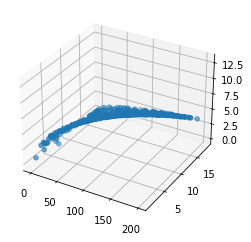

In [63]:
##plt.scatter(income, expenses, work_hours)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(income,  work_hours,expenses)